### ЛР № 3

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [2]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from sklearn.datasets import load_iris, load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [3]:
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# чтение обучающей выборки
data = pd.read_csv('StudentsPerformance.csv')

In [6]:
data = data.fillna(5)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
data.drop(['gender','race/ethnicity','parental level of education','lunch','test preparation course'], axis = 1, inplace = True)

In [8]:
data

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [9]:
data = data.fillna(1)
data.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [10]:
parts = np.split(data, [2,3], axis=1)
X = parts[0]
Y = parts[1]
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    math score  reading score
0          72             72
1          69             90
2          90             95
3          47             57
4          76             78 

Выходные данные:

    writing score
0             74
1             88
2             93
3             44
4             75


## Разделение выборки

In [11]:
 X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, test_size=0.03)

In [12]:
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

      math score  reading score
869          49             51
97           63             72
470          83             85
905          88             77
525          68             60 

Входные параметры тестовой выборки:

      math score  reading score
881          71             70
522          69             58
941          78             91
140          76             72
264          76             73 

Выходные параметры обучающей выборки:

      writing score
869             51
97              70
470             90
905             77
525             59 

Выходные параметры тестовой выборки:

      writing score
881             70
522             57
941             96
140             71
264             68


In [13]:
# Проверим правильность разделения выборки на тестовую и обучающую. Посмотрим на размеры матриц.
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(970, 2)
(30, 2)
(970, 1)
(30, 1)


# Модель ближайших соседей для произвольного гиперпараметра K

In [14]:
from sklearn.neighbors import KNeighborsRegressor

In [15]:
# Решение задачи регрессии методом 2, 5 и 10 ближайших соседей
Regressor_2NN = KNeighborsRegressor(n_neighbors = 2) 
Regressor_5NN = KNeighborsRegressor(n_neighbors = 5)
Regressor_10NN = KNeighborsRegressor(n_neighbors = 10) 
print('Пример модели:\n\n', Regressor_10NN)

Пример модели:

 KNeighborsRegressor(n_neighbors=10)


In [16]:
Regressor_2NN.fit(X_train, Y_train)
Regressor_5NN.fit(X_train, Y_train)
Regressor_10NN.fit(X_train, Y_train)
target_2NN = Regressor_2NN.predict(X_test)
target_5NN = Regressor_5NN.predict(X_test)
target_10NN = Regressor_10NN.predict(X_test)
print('Пример предсказанных значений:\n\n', target_10NN[:5], '\n ...')

Пример предсказанных значений:

 [[71.2]
 [56.8]
 [88.8]
 [69.9]
 [69.5]] 
 ...


## Оценка качества регрессии (Метрики качества)

In [17]:
 from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score , accuracy_score

In [18]:
# Оценка средней абсолютной ошибки
print('Средняя абсолютная ошибка для 2 ближайших соседей:',mean_absolute_error(Y_test,
target_2NN))
print('Средняя абсолютная ошибка для 5 ближайших соседей:',mean_absolute_error(Y_test,
target_5NN))
print('Средняя абсолютная ошибка для 10 ближайших соседей:',mean_absolute_error(Y_test,
target_10NN))

Средняя абсолютная ошибка для 2 ближайших соседей: 3.25
Средняя абсолютная ошибка для 5 ближайших соседей: 2.866666666666667
Средняя абсолютная ошибка для 10 ближайших соседей: 2.9666666666666663


In [19]:
# Оценка средней квадратичной ошибки
print('Средняя квадратичная ошибка для 2 ближайших соседей:',mean_squared_error(Y_test,
target_2NN))
print('Средняя квадратичная ошибка для 5 ближайших соседей:',mean_squared_error(Y_test,
target_5NN))
print('Средняя квадратичная ошибка для 10 ближайших соседей:',mean_squared_error(Y_test
, target_10NN))

Средняя квадратичная ошибка для 2 ближайших соседей: 16.775
Средняя квадратичная ошибка для 5 ближайших соседей: 14.685333333333336
Средняя квадратичная ошибка для 10 ближайших соседей: 17.823999999999998


In [20]:
# Оценка коэффициента детерминации

print('Коэффициент детерминации для 2 ближайших соседей:',r2_score(Y_test, target_2NN))
print('Коэффициент детерминации для 5 ближайших соседей:',r2_score(Y_test, target_5NN))
print('Коэффициент детерминации для 10 ближайших соседей:',r2_score(Y_test, target_10NN
))

Коэффициент детерминации для 2 ближайших соседей: 0.9389467171349541
Коэффициент детерминации для 5 ближайших соседей: 0.9465521424758577
Коэффициент детерминации для 10 ближайших соседей: 0.9351288397146601


In [21]:
## Grid Search (решетчатый поиск)

In [22]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## Подбор гиперпараметров

## GridSearch через среднюю квадратичную ошибку
Рассмотрим все количества ближайших соседей от 1 до 100, чтобы найти лучший результат. Возьмем 10 фолдов.

In [23]:
from sklearn.model_selection import GridSearchCV
n_range = np.array(range(1, 101, 1))
tuned_parameters = [{'n_neighbors': n_range}]
gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=10, scoring='neg_mean_squared_error')
gs.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])}],
             scoring='neg_mean_squared_error')

In [24]:
print('Лучшая модель:\n\n', gs.best_estimator_)
print('\nЛучшее число ближайших соседей:\n\n',gs.best_params_) 
print('\nЛучшее значение средней квадратичной ошибки:\n\n',-gs.best_score_)

Лучшая модель:

 KNeighborsRegressor(n_neighbors=9)

Лучшее число ближайших соседей:

 {'n_neighbors': 9}

Лучшее значение средней квадратичной ошибки:

 22.321776759577446


Изменение качества тестовой выборки в зависимости от кол-ва соседей:



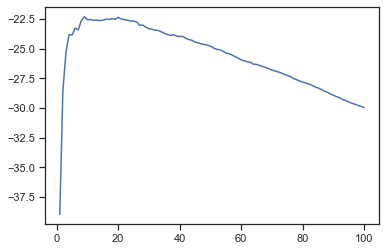

In [25]:
 print('Изменение качества тестовой выборки в зависимости от кол-ва соседей:\n') 
plt.plot(n_range, gs.cv_results_['mean_test_score'])

## GridSearch через коэффициент детерминации

Лучшая модель:

 KNeighborsRegressor(n_neighbors=9)

Лучшее число ближайших соседей:

 {'n_neighbors': 9}

Лучшее значение коэффициента детерминации:

 0.8984675805999685

Изменение качества тестовой выборки в зависимости от кол-ва соседей:



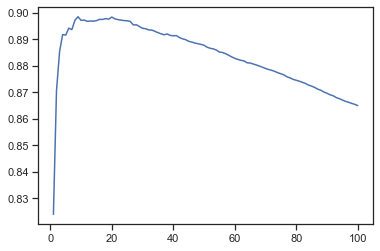

In [26]:
gs_det = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=10, scoring='r2') 
gs_det.fit(X_train, Y_train)
print('Лучшая модель:\n\n', gs_det.best_estimator_)
print('\nЛучшее число ближайших соседей:\n\n',gs_det.best_params_)
print('\nЛучшее значение коэффициента детерминации:\n\n',gs_det.best_score_)
print('\nИзменение качества тестовой выборки в зависимости от кол-ва соседей:\n') 
plt.plot(n_range, gs_det.cv_results_['mean_test_score'])

## Кросс-валидация

In [27]:
from sklearn.model_selection import cross_val_score
scores_2NN = cross_val_score(KNeighborsRegressor(n_neighbors = 2), X, Y, cv=5, scoring= 'r2')
scores_5NN = cross_val_score(KNeighborsRegressor(n_neighbors = 5), X, Y, cv=5, scoring= 'r2')
scores_8NN = cross_val_score(KNeighborsRegressor(n_neighbors = 8), X, Y, cv=5, scoring= 'r2')
scores_10NN = cross_val_score(KNeighborsRegressor(n_neighbors = 10), X, Y, cv=5, scoring = 'r2')
scores_50NN = cross_val_score(KNeighborsRegressor(n_neighbors = 50), X, Y, cv=5, scoring = 'r2')
scores_100NN = cross_val_score(KNeighborsRegressor(n_neighbors = 100), X, Y, cv=5, scoring = 'r2')
print('Пример значений коэф. детерминации для 5 фолдов для метода 10 ближайших соседей: \n', scores_10NN, '\n\n')
print('Усредненное значение коэффициента детерминации для:\n') 
print('- 2 ближайших соседей:', np.mean(scores_2NN), '\n') 
print('- 5 ближайших соседей:', np.mean(scores_5NN), '\n') 
print('- 8 ближайших соседей:', np.mean(scores_8NN), '\n') 
print('- 10 ближайших соседей:', np.mean(scores_10NN), '\n') 
print('- 50 ближайших соседей:', np.mean(scores_50NN), '\n') 
print('- 100 ближайших соседей:', np.mean(scores_100NN), '\n')

Пример значений коэф. детерминации для 5 фолдов для метода 10 ближайших соседей: 
 [0.92184288 0.89043386 0.89916629 0.8981071  0.90823066] 


Усредненное значение коэффициента детерминации для:

- 2 ближайших соседей: 0.8770631292779022 

- 5 ближайших соседей: 0.8994613829947763 

- 8 ближайших соседей: 0.9034792669326392 

- 10 ближайших соседей: 0.9035561574397617 

- 50 ближайших соседей: 0.8896256805469298 

- 100 ближайших соседей: 0.8642910561914332 

